In [46]:
#Task: Customer Segmentation Using Clustering (Beginners & Experienced Interns)
#Goal: Use clustering algorithms to segment customers based on their spending behavior, age, income, and preferences.
#Requirements:
#● Perform Exploratory Data Analysis (EDA) to understand customer features.
#● Apply K-Means clustering or Hierarchical clustering to segment customers.
#● Visualize customer segments and interpret their behavior.
#Dataset:
#● Mall Customer Segmentation Dataset Expected Outcome:
#A customer segmentation system that helps businesses understand different groups of customers based on spending patterns and demographics.

In [46]:
# Import necessary libraries
import pandas as pd # For data manipulation
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For statistical data visualization
from sklearn.cluster import KMeans  # For K-Means clustering
from sklearn.preprocessing import StandardScaler # For data normalization

In [103]:
# Load the dataset
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [105]:
# Display the first 5 rows of the dataset to understand its structure
df.head(5) 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [49]:
# Get the number of rows and columns in the dataset
df.shape

(200, 5)

In [50]:
# Display summary information about the dataset, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [51]:
# Check for missing values in each column
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [52]:
# Check for duplicate values in each column
df.duplicated().sum()

0

In [53]:
# Convert the "Gender" column to numerical values (Male -> 0, Female -> 1) for easier processing
df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1}).astype(int)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4644\701954675.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1}).astype(int)


In [54]:
# checking the changes in first five rows
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


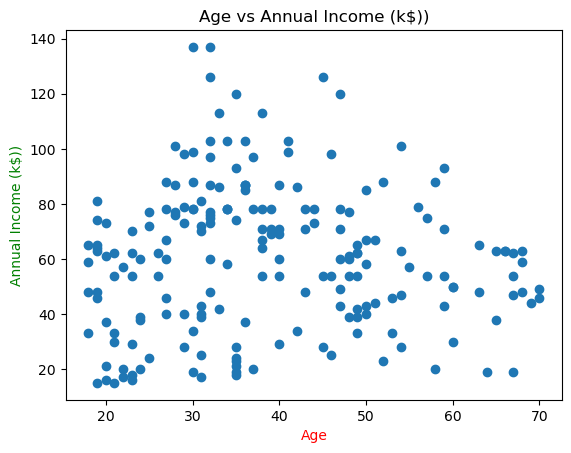

In [55]:
# Scatter plot to visualize the relationship between Age and Annual Income
plt.scatter(df["Age"], df["Annual Income (k$)"])
plt.xlabel("Age",color='red')
plt.ylabel("Annual Income (k$))",color='green')
plt.title("Age vs Annual Income (k$))")
plt.show()


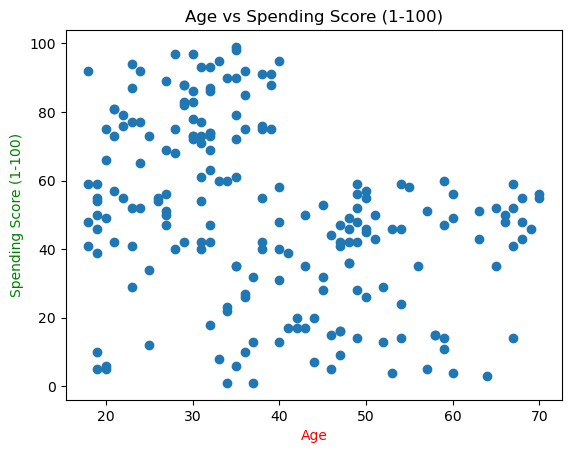

In [56]:
# Scatter plot to visualize the relationship between Age and Spending Score
plt.scatter(df["Age"], df["Spending Score (1-100)"])
plt.xlabel("Age",color='red')
plt.ylabel("Spending Score (1-100)",color='green')
plt.title("Age vs Spending Score (1-100)")
plt.show()


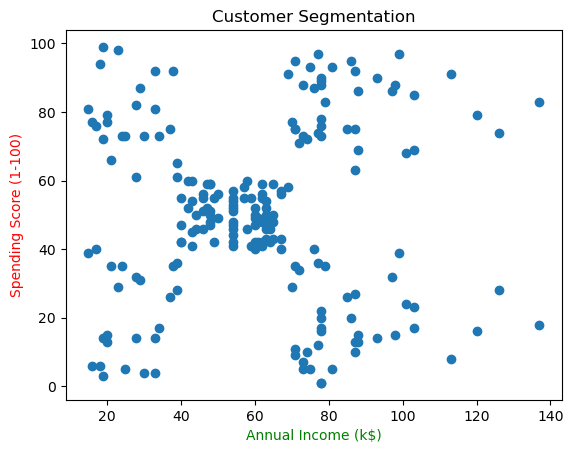

In [57]:
# Scatter plot to visualize the relationship between Annual Income and Spending Score
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)",color="green")
plt.ylabel("Spending Score (1-100)",color="red")
plt.title("Customer Segmentation")
plt.show()


In [58]:
# List to store the Sum of Squared Errors (SSE) for different values of K
sse=[]
k_rng = range(1,10) # Defining the range for K (number of clusters)

# Loop through different values of K
for k in k_rng: 
    km=KMeans(n_clusters=k)   # Initialize K-Means clustering model with k cluster
    
    # Fit the model on the selected features
    km.fit(df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]) 
    
    # Append the inertia (SSE) value to the list
    sse.append(km.inertia_) 

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

In [107]:
# Display the SSE values for different k
sse

[308862.06,
 212889.442455243,
 143391.59236035674,
 105299.98742210324,
 75427.71182424153,
 68345.12943848422,
 54816.7902462175,
 49092.97085326953,
 41975.29613997114]

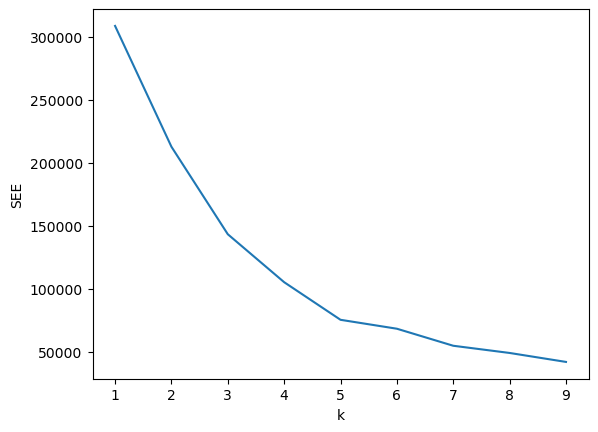

In [60]:
# Plotting SSE to find the optimal number of clusters
plt.xlabel("k")
plt.ylabel("SEE")
plt.plot(k_rng,sse)

In [61]:
# Performing clustering and assigning labels
from sklearn.metrics import silhouette_score

for k in [4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)  # Replace 'data' with your feature variables
    score = silhouette_score(df, labels)
    print(f"Silhouette Score for k={k}: {score}")


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score for k=4: 0.42245261332521894
Silhouette Score for k=5: 0.4336704604654853


In [62]:
# Assigning each customer to one of the 5 clusters
km=KMeans(n_clusters=5)
predicted=km.fit_predict(df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']])
predicted

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [63]:
df['cluster']=predicted # Adding the cluster labels to the original dataset  
df.head(5) # Displaying the first five rows with the assigned clusters

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,0,19,15,39,1
1,2,0,21,15,81,4
2,3,1,20,16,6,1
3,4,1,23,16,77,4
4,5,1,31,17,40,1


In [64]:
 df.tail(2)  # Displaying the last two rows of the dataset 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
198,199,0,32,137,18,0
199,200,0,30,137,83,3


In [65]:
df.iloc[[46]] # Accessing the row at index 46  

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
46,47,1,50,40,55,2


In [66]:
km.cluster_centers_ # Retrieving the coordinates of the cluster centers 

array([[ 0.47222222, 40.66666667, 87.75      , 17.58333333],
       [ 0.60869565, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.5974026 , 43.72727273, 55.48051948, 49.32467532],
       [ 0.53846154, 32.69230769, 86.53846154, 82.12820513],
       [ 0.56      , 24.96      , 28.04      , 77.        ]])

In [67]:
 # Creating separate DataFrames for each customer cluster
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

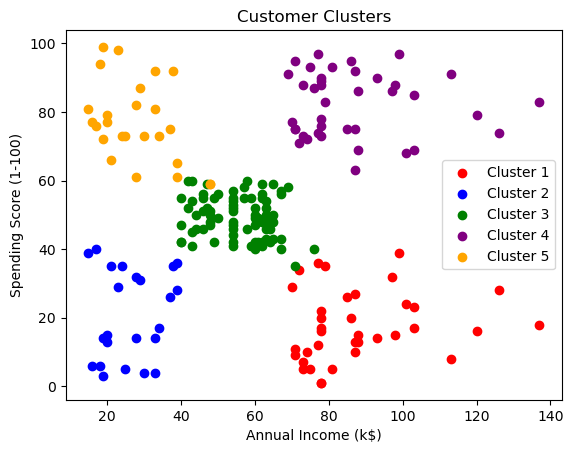

In [68]:
 # Visualizing customer clusters based on income and spending behavior
plt.scatter(df1["Annual Income (k$)"], df1["Spending Score (1-100)"], color='red', label="Cluster 1")
plt.scatter(df2["Annual Income (k$)"], df2["Spending Score (1-100)"], color='blue', label="Cluster 2")
plt.scatter(df3["Annual Income (k$)"], df3["Spending Score (1-100)"], color='green', label="Cluster 3")
plt.scatter(df4["Annual Income (k$)"], df4["Spending Score (1-100)"], color='purple', label="Cluster 4")
plt.scatter(df5["Annual Income (k$)"], df5["Spending Score (1-100)"], color='orange', label="Cluster 5")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Clusters")
plt.legend()
plt.show()
